# Name: DESIREE GARCIA

# Section: CpE-4102

# Objective
Students will independently implement NLP models for tasks like text classification or sentiment
analysis. They will find and use their own dataset, preprocess the data, extract features, train the
model, evaluate it, and present the results.

# Instructions:

# 1. Choose an NLP Task
Select a specific NLP task, such as:

* Text classification (e.g., spam detection, news categorization)
* Sentiment analysis (e.g., product reviews, social media sentiment)
* Named entity recognition or other NLP tasks of interest

Then I chose sentiment analysis with product reviews.

# 2. Find a Dataset
Locate a dataset online (e.g., Kaggle, UCI Machine Learning Repository, GitHub, or APIs like
Twitter or Reddit). Ensure the dataset is relevant to the selected task. Verify the dataset includes:

* Input: Raw text (e.g., emails, tweets, reviews).
* Labels/Outputs: Categories or sentiments for the task.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
data_path = od.download("https://www.kaggle.com/datasets/rajatkumar30/fake-news/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: garciadesiree
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rajatkumar30/fake-news


100%|██████████| 11.5M/11.5M [00:00<00:00, 95.1MB/s]

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
# Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Natural Language Processing tools
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_t')

# Sequence padding and tokenization for deep learning models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# TensorFlow/Keras imports for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading punkt_t: Package 'punkt_t' not found in
[nltk_data]     index


In [ ]:
dataset=pd.read_csv('/content/fake-news/news.csv')

In [ ]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# 3. Preprocess the Data
Perform the following steps:
* Cleaning: Remove special characters, punctuation, and unnecessary whitespace. Convert
text to lowercase.
* Tokenization: Split text into words or sentences.
* Stopword Removal: Remove common words that do not add value (e.g., &#39;the,&#39; &#39;is&#39;).
* Stemming/Lemmatization: Reduce words to their root forms.
* Text Vectorization: Use one of the following methods:
** Bag of Words (BoW)
** Term Frequency-Inverse Document Frequency (TF-IDF)
** Word Embeddings (e.g., Word2Vec, GloVe)

In [ ]:
stopwords_en=stopwords.words('english')
ps_stemmer=nltk.PorterStemmer()

def clean_text(text):

    #convert to lower case
    clean_text=text.lower()
    #remove punctuations
    clean_text=re.sub('\W+',' ',clean_text)
    #remove extra spaces
    clean_text=re.sub('\s+',' ',clean_text)
    #word tokenize
    clean_text=clean_text.split(' ')
    #remove stopwords
    clean_text=[word for word in clean_text if word not in stopwords_en+['']]
    #word stemming
    clean_text=[ps_stemmer.stem(word) for word in clean_text]
    #list to string
    clean_text=' '.join(clean_text)

    return clean_text


In [ ]:
sample_per_class = 1  # Number of samples to take from each class
sampled_dataset = dataset.groupby('label').apply(lambda x: x.sample(n=sample_per_class, random_state=1)).reset_index(drop=True)

for index, row in sampled_dataset.iterrows():
    print("Label:", row["label"], "\nText:", row["text"], "\n")

Label: FAKE 
Text: NEW WIKILEAK : Top Clinton Operative Believes “BLACK VOTERS ARE STUPID” NEW WIKILEAK : Top Clinton Operative Believes “BLACK VOTERS ARE STUPID” Videos By TruthFeedNews November 2, 2016 
A new email released as part of the Wikileaks Podesta dump features Clinton ally Brent Budowsky exposing Hillary operative David Brock of having a plan that relied upon black voters being “stupid.” 
Why is their ZERO reporting of this on mainstream news? 
Watch the video: 
Support the Trump Movement and help us fight Liberal Media Bias. Please LIKE and SHARE this story on Facebook or Twitter. 
 

Label: REAL 
Text: The 8th Democratic Debate In 100 Words (And 4 Videos)

In Miami and on Univision, the eighth Democratic debate focused heavily on issues important to Latinos. It meant Sanders and Clinton parted ways with Obama, promising to end deportations. Clinton was asked some tough questions, including whether she would suspend her campaign if she was indicted over her email issue. "I

<ipython-input-8-f242a721ef37>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_dataset = dataset.groupby('label').apply(lambda x: x.sample(n=sample_per_class, random_state=1)).reset_index(drop=True)


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Ensure input is a string
    if not isinstance(text, str):
        return ""

    # Remove URLs, markdown links, and mentions
    text = re.sub(r"http[s]?://\S+", "", text)  # Remove URLs
    text = re.sub(r"\[.*?\]\(.*?\)", "", text)  # Remove markdown links
    text = re.sub(r"@\w+", "", text)           # Remove mentions

    # Remove special characters and extra spaces
    text = re.sub(r"[^\w\s]", "", text)        # Remove punctuation
    text = text.strip()                        # Remove leading/trailing whitespace

    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return " ".join(tokens)

# Removing reddit's Age-Gender pattern
def remove_age_gender_pattern(statement):
    """Remove age and gender patterns (like '24M' or '30F') from the statement."""
    if not isinstance(statement, str):
        return statement
    pattern = r'\b\d{1,3}[MF]\b'
    cleaned_statement = re.sub(pattern, '', statement)
    return cleaned_statement.strip()

# Apply preprocessing
dataset['cleaned_text'] = dataset['text'].apply(preprocess_text)
dataset['cleaned_text'] = dataset['cleaned_text'].apply(remove_age_gender_pattern)


# 4. Train the Model and Split the Data in 80% for training and 20% for test

In [ ]:
X = dataset['text']
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One hot encode categorical labels
y_train_encoded = pd.get_dummies(y_train).values
y_test_encoded = pd.get_dummies(y_test).values

In [ ]:
dataset['title_text']=dataset['title']+dataset['text']
dataset['clean_text']=dataset['title_text'].apply(clean_text)
dataset['text_length']=dataset['title_text'].apply(lambda x:len(x))
dataset['word_count']=dataset['title_text'].apply(lambda x:len(x.split(' ')))
dataset['text_punctuations_percentage']=dataset['title_text'].apply(lambda x : len([a for a in x if a in string.punctuation])/len(x))
dataset['label']=dataset['label'].replace({'FAKE':0,'REAL':1})
dataset.head()

<ipython-input-11-726f153c2008>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['label']=dataset['label'].replace({'FAKE':0,'REAL':1})


,Unnamed: 0,title,text,label,cleaned_text,title_text,clean_text,text_length,word_count,text_punctuations_percentage
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journalism fellow f...,"You Can Smell Hillary’s FearDaniel Greenfield,...",smell hillari feardaniel greenfield shillman j...,7546,1302,0.014180
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan commit polit suic...,2731,459,0.023801
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,u secretary state john f kerry said monday sto...,Kerry to go to Paris in gesture of sympathyU.S...,kerri go pari gestur sympathyu secretari state...,2586,431,0.016628
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kaydee king november 9 2016 lesson tonight dem...,Bernie supporters on Twitter erupt in anger ag...,berni support twitter erupt anger dnc tri warn...,2744,418,0.030612
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,primary day new york frontrunners hillary clin...,The Battle of New York: Why This Primary Matte...,battl new york primari mattersit primari day n...,1888,315,0.034958


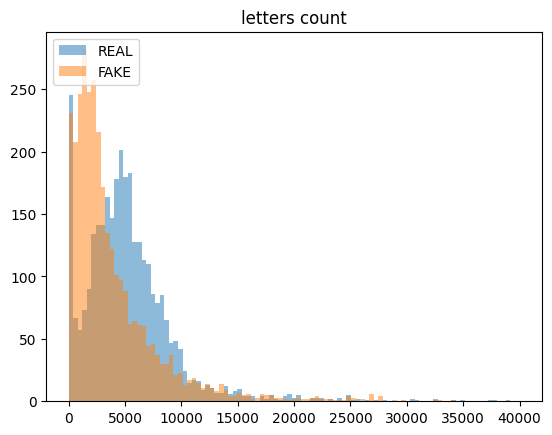

In [ ]:
plt.hist(dataset[dataset['label']==1]['text_length'],bins=np.linspace(0,40000,100),alpha=0.5,label='REAL')
plt.hist(dataset[dataset['label']==0]['text_length'],bins=np.linspace(0,40000,100),alpha=0.5,label='FAKE')
plt.title('letters count')
plt.legend(loc='upper left')
plt.show()

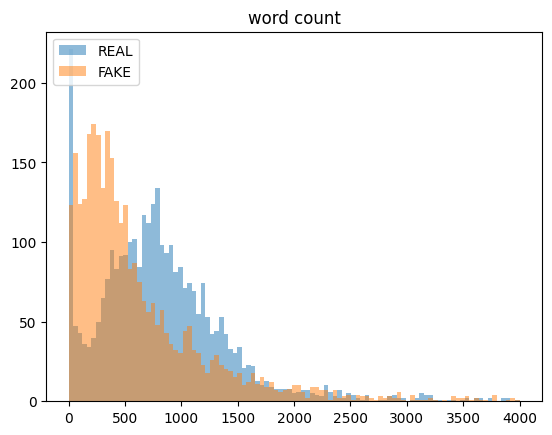

In [ ]:
plt.hist(dataset[dataset['label']==1]['word_count'],bins=np.linspace(0,4000,100),alpha=0.5,label='REAL')
plt.hist(dataset[dataset['label']==0]['word_count'],bins=np.linspace(0,4000,100),alpha=0.5,label='FAKE')
plt.title('word count')
plt.legend(loc='upper left')
plt.show()

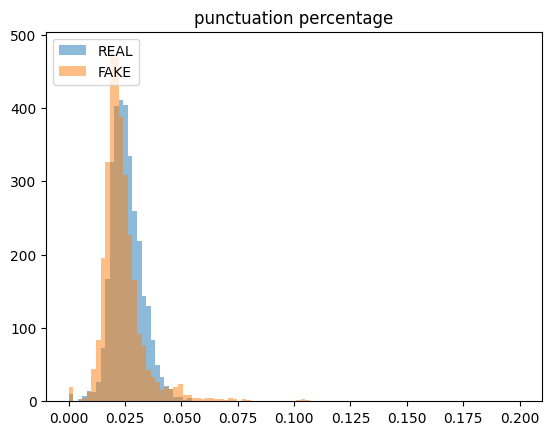

In [ ]:
plt.hist(dataset[dataset['label']==1]['text_punctuations_percentage'],bins=np.linspace(0,0.2,100),alpha=0.5,label='REAL')
plt.hist(dataset[dataset['label']==0]['text_punctuations_percentage'],bins=np.linspace(0,0.2,100),alpha=0.5,label='FAKE')
plt.legend(loc='upper left')
plt.title('punctuation percentage')
plt.show()

# WORD2VEC

In [ ]:
def w2v_vectorize(corpus,vector_size=100,model=None):
    features = []
    if model==None:
        model=Word2Vec(corpus,vector_size=vector_size,seed=42)
    for tokens in corpus:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens.split(' '):
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return model,features

def tfidf_vectorizor(corpus,vector_size=100,model=None):
    if model ==None:
        model=TfidfVectorizer(max_features=vector_size)
    model=model.fit(corpus)
    tf_vector=model.transform(corpus)
    return model,tf_vector

w2v_model,w2v_vector=w2v_vectorize(dataset['clean_text'],vector_size=300)
tf_model,tfidf_vector=tfidf_vectorizor(dataset['clean_text'],vector_size=300)
tfidf_vector.shape

(6335, 300)

# Vectorization using BoW

In [ ]:
from tensorflow.keras.layers import TextVectorization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming X_train is a numpy array of text data, you can directly pass it to the vectorizer
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)

# If X_train is already a numpy array, no need to call .to_numpy(), just use X_train
vectorizer.adapt(X_train.values)

# Now vectorize your train and test data
X_train_vectorized = vectorizer(X_train.values)
X_test_vectorized = vectorizer(X_test.values)

# Calculate class weights for balanced training
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Print class weights for debugging
print(class_weight_dict)


{0: 0.999211356466877, 1: 1.0007898894154819}


In [ ]:
X=pd.DataFrame(tfidf_vector.toarray())
X['word_count']=dataset['word_count']
X['text_punctuations_percentage']=dataset['text_punctuations_percentage']
Y=dataset['label']
X.columns = X.columns.astype(str)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [ ]:
rfc=GradientBoostingClassifier()
rfc=rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       316
           1       0.90      0.89      0.90       318

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634



In [ ]:
rfc=RandomForestClassifier()
rfc=rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       316
           1       0.90      0.91      0.91       318

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



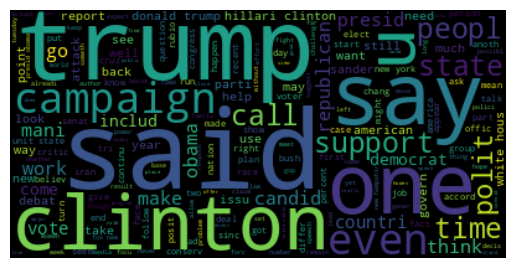

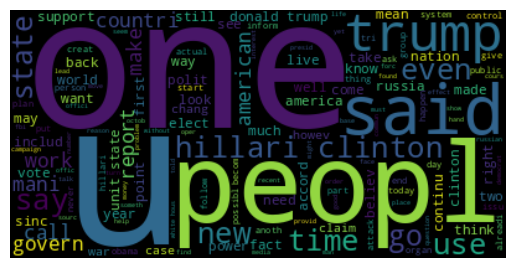

In [ ]:
# separate texts with label = 1
text_1 = ' '.join(dataset[dataset['label']==1]['clean_text'])

# create a word cloud
wordcloud_1 = WordCloud().generate(text_1)

plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

# repeat for label = 0
text_0 = ' '.join(dataset[dataset['label']==0]['clean_text'])
wordcloud_0 = WordCloud().generate(text_0)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

# Reshape the data for 1D CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Create a 1D CNN model with 5 layers
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(302, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 1 neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.5960 - loss: 0.7859 - val_accuracy: 0.8486 - val_loss: 0.3523
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.8173 - loss: 0.3975 - val_accuracy: 0.8391 - val_loss: 0.3668
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.8492 - loss: 0.3526 - val_accuracy: 0.8785 - val_loss: 0.2986
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.8715 - loss: 0.3017 - val_accuracy: 0.8849 - val_loss: 0.2746
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.8935 - loss: 0.2557 - val_accuracy: 0.8864 - val_loss: 0.2640
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.8994 - loss: 0.2301 - val_accuracy: 0.8833 - val_loss: 0.3088
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9206 - loss: 0.1982 - val_accuracy: 0.8817 - val_loss: 0.3027
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9444 - loss: 0.1455 -

In [ ]:
pred=model.predict(X_test)
accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy[1] * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9017 - loss: 0.4168
Test Accuracy: 87.70%


In [ ]:
# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       316
           1       0.85      0.92      0.88       318

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634



# 5. Evaluate the Model
Use performance metrics:
* Accuracy, Precision, Recall, F1-Score (for classification tasks).
* Confusion Matrix.
Plot the training results:
* Training vs. validation accuracy and loss over epochs.

Use visualization tools like Matplotlib or Seaborn.

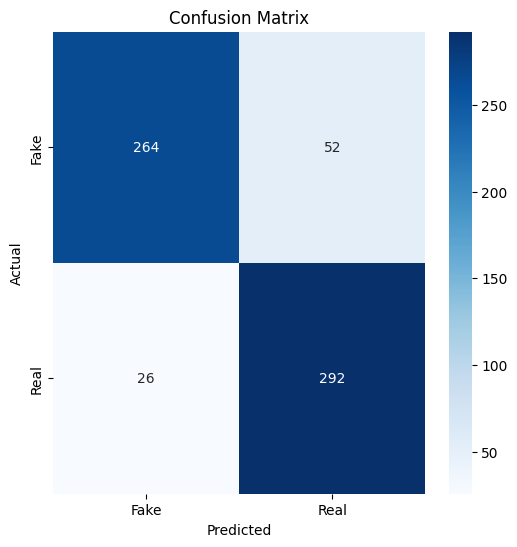

In [ ]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


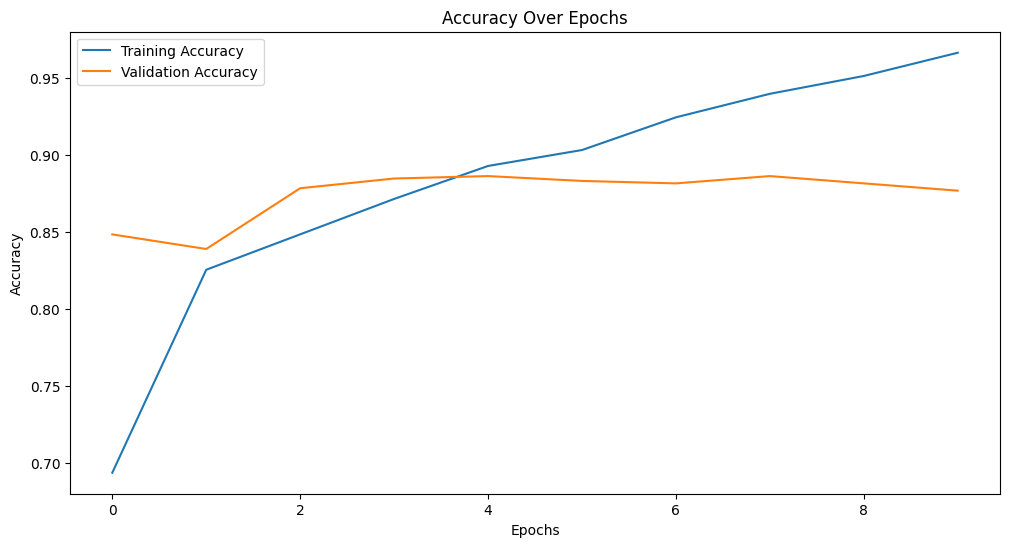

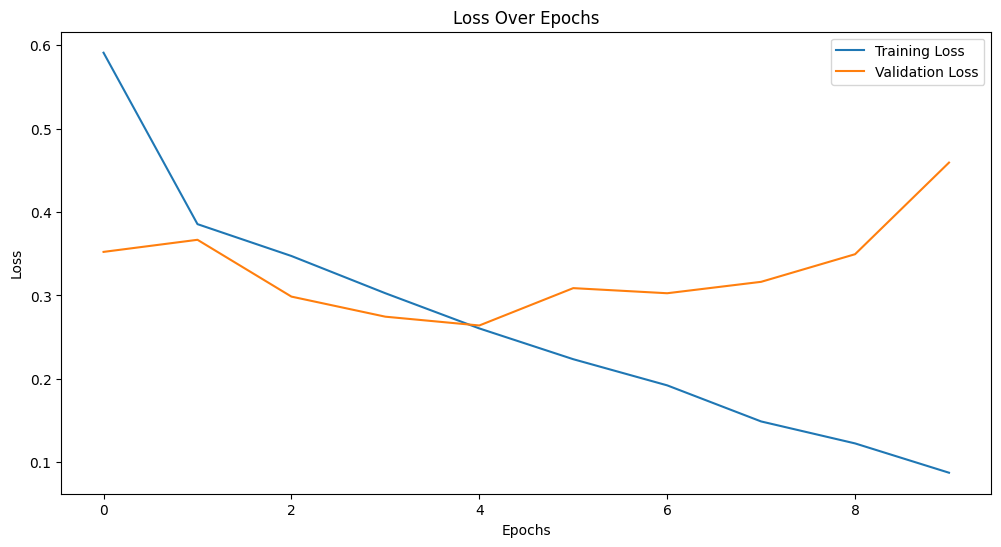

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Accuracy: 0.8770
Precision: 0.8795
Recall: 0.8770
F1-Score: 0.8767


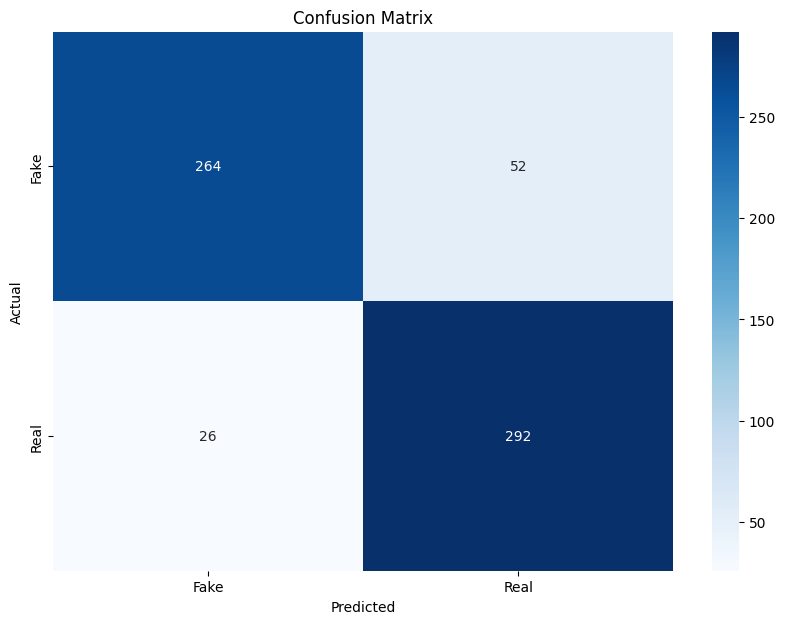

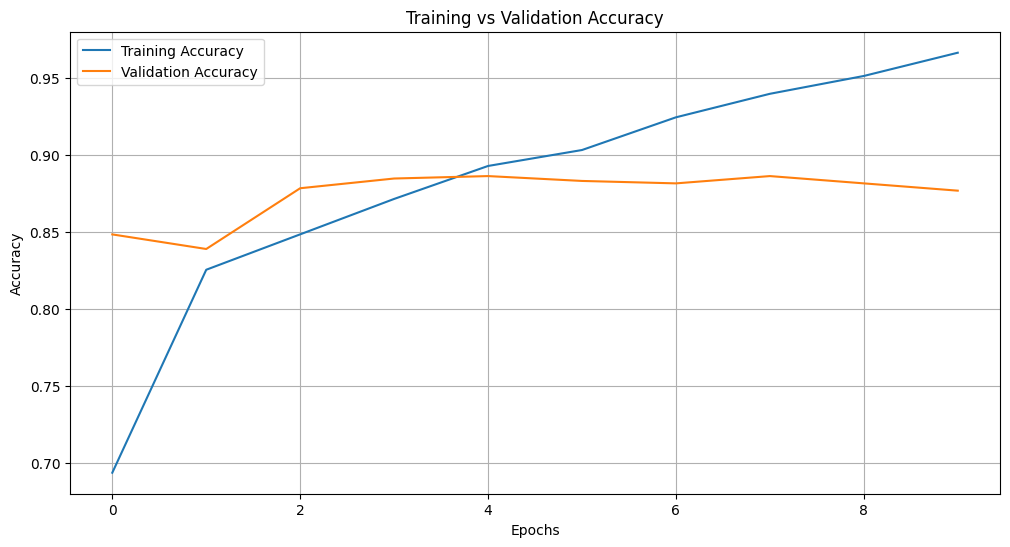

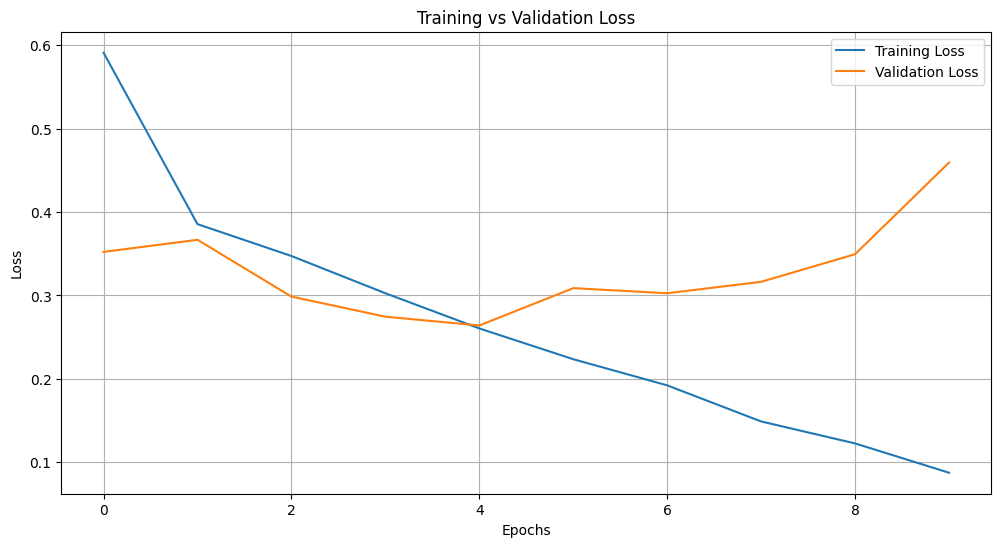

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the class probabilities
y_pred_probs = model.predict(X_test)

# For binary classification, convert probabilities to class labels (threshold = 0.5)
y_pred_class = (y_pred_probs > 0.5).astype(int).flatten()  # Adjust for binary classification

# For multi-class classification (if applicable)
# y_pred_class = np.argmax(y_pred_probs, axis=1)

# Encode the test labels to numeric values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test_encoded, y_pred_class)
precision = precision_score(y_test_encoded, y_pred_class, average='weighted')
recall = recall_score(y_test_encoded, y_pred_class, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_class, average='weighted')

# Print performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_class)

# Get unique class labels from the status column
class_labels = label_encoder.classes_

# Class labels (from your dataset)
class_labels = ['Fake', 'Real']

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Training vs Validation Accuracy and Loss (if `history` is available)
if 'accuracy' in history.history:
    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

if 'loss' in history.history:
    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# 6. Implement and Visualize Results
Test the model on unseen data. Present results using:
* Graphs and plots.
* Examples of predictions (e.g., actual vs. predicted sentiment).

Unseen data shape: (5, 302, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


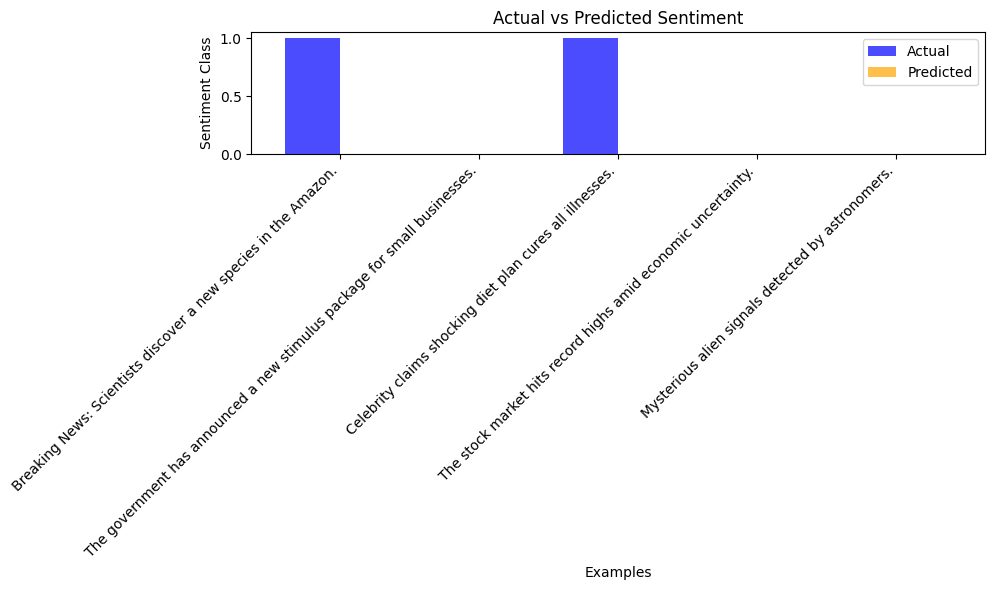


Example predictions:
Text: Breaking News: Scientists discover a new species in the Amazon.
Actual Sentiment: Real - Fake
--------------------------------------------------
Text: The government has announced a new stimulus package for small businesses.
Actual Sentiment: Fake - Fake
--------------------------------------------------
Text: Celebrity claims shocking diet plan cures all illnesses.
Actual Sentiment: Real - Fake
--------------------------------------------------
Text: The stock market hits record highs amid economic uncertainty.
Actual Sentiment: Fake - Fake
--------------------------------------------------
Text: Mysterious alien signals detected by astronomers.
Actual Sentiment: Fake - Fake
--------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Example unseen data
unseen_data = [
    "Breaking News: Scientists discover a new species in the Amazon.",
    "The government has announced a new stimulus package for small businesses.",
    "Celebrity claims shocking diet plan cures all illnesses.",
    "The stock market hits record highs amid economic uncertainty.",
    "Mysterious alien signals detected by astronomers."
]

# Step 1: Initialize vectorizer (fit it on the training data)
vectorizer = TfidfVectorizer(max_features=300)  # Adjust the number of features based on your model's training data

# Fit the vectorizer on training data (X_train)
vectorizer.fit(X_train)  # This step should be done only once using your training data

# Step 2: Transform unseen data
unseen_data_vectorized = vectorizer.transform(unseen_data).toarray()  # Shape: (num_samples, 300)

# Step 3: Pad unseen data to match the expected number of features (302)
# Pad the data to 302 features (you can also pad with a specific strategy if needed)
unseen_data_padded = np.pad(unseen_data_vectorized, ((0, 0), (0, 2)), mode='constant', constant_values=0)  # Shape: (num_samples, 302)

# Step 4: Reshape unseen data to match the input shape (num_samples, 302, 1)
unseen_data_reshaped = unseen_data_padded.reshape(unseen_data_padded.shape[0], unseen_data_padded.shape[1], 1)

# Check the shape before prediction
print("Unseen data shape:", unseen_data_reshaped.shape)

# Step 5: Predict sentiment for the unseen data
unseen_pred = model.predict(unseen_data_reshaped)  # Predict sentiment

# Step 6: Convert predictions to class labels
unseen_pred_class = (unseen_pred > 0.5).astype(int).flatten()  # Convert predictions to 0 or 1 (Fake or Real)

# Step 7: Visualization

# Plot: Actual vs Predicted Sentiment (Bar Chart)
class_labels = ['Fake', 'Real']

# Actual Sentiments for the unseen data (for visualization, assume these are the correct labels)
# For example purposes, let's assume that the first and third examples are fake news, and the rest are real
actual_labels = [1, 0, 1, 0, 0]  # 1 = Fake, 0 = Real (replace with actual labels if known)

# Plot bar graph of actual vs predicted
x = np.arange(len(unseen_data))  # x-axis for the examples

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, actual_labels, 0.4, label='Actual', color='blue', alpha=0.7)
plt.bar(x + 0.2, unseen_pred_class, 0.4, label='Predicted', color='orange', alpha=0.7)

plt.xlabel('Examples')
plt.ylabel('Sentiment Class')
plt.title('Actual vs Predicted Sentiment')
plt.xticks(x, unseen_data, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Example Sentiments and Predictions
print("\nExample predictions:")
for i, text in enumerate(unseen_data):
    print(f"Text: {text}")
    print(f"Actual Sentiment: {class_labels[actual_labels[i]]} - {class_labels[unseen_pred_class[i]]}")
    print("-" * 50)


Model input shape: (None, 302, 1)
Reshaped unseen data shape: (5, 302, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Class Labels: ['Real', 'Fake']
Text: Breaking News: Scientists discover a new species in the Amazon.
Predicted Sentiment: Real

Text: The government has announced a new stimulus package for small businesses.
Predicted Sentiment: Real

Text: Celebrity claims shocking diet plan cures all illnesses.
Predicted Sentiment: Real

Text: The stock market hits record highs amid economic uncertainty.
Predicted Sentiment: Real

Text: Mysterious alien signals detected by astronomers.
Predicted Sentiment: Real



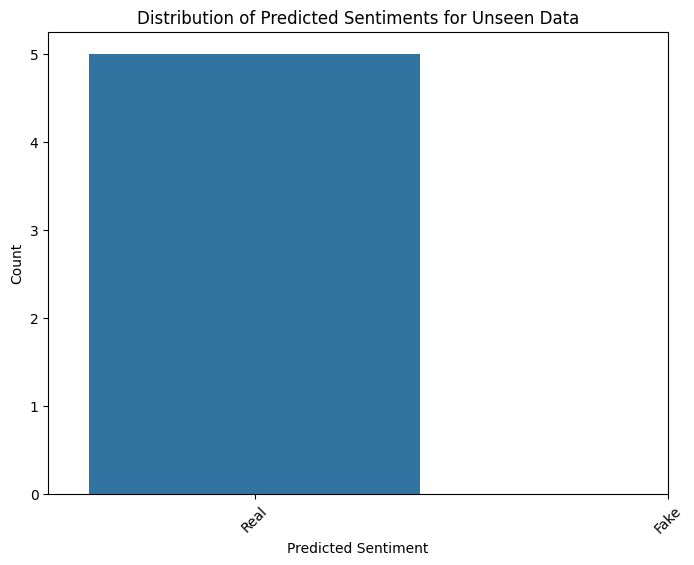

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Example unseen data
unseen_data = [
    "Breaking News: Scientists discover a new species in the Amazon.",
    "The government has announced a new stimulus package for small businesses.",
    "Celebrity claims shocking diet plan cures all illnesses.",
    "The stock market hits record highs amid economic uncertainty.",
    "Mysterious alien signals detected by astronomers."
]

# Step 1: Initialize vectorizer (fit it on the training data)
vectorizer = TfidfVectorizer(max_features=302)  # Adjust max_features to match the model input size

# Fit the vectorizer on the training data (X_train)
vectorizer.fit(X_train)  # This step should be done only once using your training data

# Step 2: Transform unseen data
unseen_data_vectorized = vectorizer.transform(unseen_data).toarray()  # Shape: (num_samples, 302)

# Check model's input shape
print(f"Model input shape: {model.input_shape}")

# Step 3: Ensure unseen data has exactly 302 features
if unseen_data_vectorized.shape[1] != 302:
    # Truncate or pad the unseen data to match the expected shape (302 features)
    unseen_data_vectorized = unseen_data_vectorized[:, :302]  # Truncate if more than 302 features
    # If fewer than 302 features, pad with zeros (this should not happen with max_features=302)
    unseen_data_vectorized = np.pad(unseen_data_vectorized, ((0, 0), (0, 302 - unseen_data_vectorized.shape[1])), mode='constant')

# Step 4: Reshape the data to (batch_size, sequence_length, 1) as expected by the model
unseen_data_reshaped = unseen_data_vectorized.reshape(unseen_data_vectorized.shape[0], unseen_data_vectorized.shape[1], 1)

# Convert the reshaped data to a TensorFlow tensor
unseen_data_tensor = tf.convert_to_tensor(unseen_data_reshaped, dtype=tf.float32)

# Check the shape of the reshaped data
print(f"Reshaped unseen data shape: {unseen_data_tensor.shape}")

# Step 5: Predict sentiment for the unseen data
unseen_pred = model.predict(unseen_data_tensor)  # No reshaping needed

# Step 6: Convert the predictions to class labels (assuming binary classification: 0 = Real, 1 = Fake)
unseen_pred_class = (unseen_pred > 0.5).astype(int).flatten()

# Class labels for binary classification
class_labels = ['Real', 'Fake']

# Print the class labels for reference
print(f'Class Labels: {class_labels}')

# Print predictions
for i, text in enumerate(unseen_data):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {class_labels[unseen_pred_class[i]]}\n")

# Step 7: Visualize the distribution of predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x=unseen_pred_class)
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels, rotation=45)
plt.title('Distribution of Predicted Sentiments for Unseen Data')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.show()
